# **Forecast de acidentes de trânsito - modelagem**

In [ ]:
!pip install -U matplotlib

In [ ]:
!pip install pycaret-ts-alpha

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from datetime import datetime
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/my_notebooks/desafio_gavb/'
path_df = path + 'complete_dataset/acidentes_2015_2019.csv'

In [5]:
df = pd.read_csv(path_df, index_col=None, header=0)
df.index = pd.to_datetime(df['data'])
df.index  = df.asfreq('d', method = 'bfill').index
df.drop(['data', 'mes', 'ano'], axis = 1, inplace = True)
df.head()

,num_acidentes,num_vitimas,bairros_envolvidos,dia_semana
data,,,,
2015-06-01,34,5.0,17,Monday
2015-06-02,46,8.0,28,Tuesday
2015-06-03,43,3.0,22,Wednesday
2015-06-04,22,3.0,12,Thursday
2015-06-05,33,7.0,22,Friday


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1675 entries, 2015-06-01 to 2019-12-31
Freq: D
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_acidentes       1675 non-null   int64  
 1   num_vitimas         1675 non-null   float64
 2   bairros_envolvidos  1675 non-null   int64  
 3   dia_semana          1675 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 65.4+ KB


# **Comparação de modelos**

## **Sem exógenas**

Modelo sem variáveis exógenas com período sazonal `[7, 14, 21, 28]`

Utilizando o método ExpandingWindowSplitter e 3 folds, com teste de tamanho 365.

In [25]:
df_modelo = df.copy()[['num_acidentes']]
s_no_exo = setup(df_modelo, session_id = 123, fh=365, seasonal_period = [7, 14, 21, 28])

,Description,Value
0,session_id,123
1,Target,num_acidentes
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1675, 1)"
5,Train data shape,"(1310, 1)"
6,Test data shape,"(365, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [26]:
best_no_exo = compare_models(sort = 'MAPE')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
theta,Theta Forecaster,6.7334,9.022,0.3578,0.2321,0.7496,0.7461,0.2363,0.2267
exp_smooth,Exponential Smoothing,6.9935,9.2942,0.3649,0.2386,0.7773,0.7673,0.1816,1.4267
ets,ETS,6.9794,9.2776,0.3664,0.2381,0.7757,0.7659,0.1838,0.4033
snaive,Seasonal Naive Forecaster,9.495,12.5833,0.3665,0.3527,1.059,1.045,-0.4656,0.0433
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,7.2061,9.3854,0.3736,0.2458,0.8001,0.7738,0.1574,0.3800
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,7.1101,9.3661,0.3799,0.2441,0.7902,0.7734,0.1701,25.2167
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,7.1292,9.3475,0.3805,0.2444,0.7918,0.7713,0.1691,0.1933
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,7.1292,9.3475,0.3805,0.2444,0.7918,0.7713,0.1691,0.1967
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,7.1292,9.3475,0.3805,0.2444,0.7918,0.7713,0.1691,0.1933
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,7.1302,9.3494,0.3806,0.2444,0.7919,0.7714,0.1688,0.1967


O modelo sem variáveis exógenas obteve menor MAPE de 36%, o que significa que, em média, o erro corresponde a 36% do valor observado. O melhor modelo escolhido foi Theta Forecaster.

## **Com exógenas**

Modelo sem variáveis exógenas com período sazonal `[7, 14, 21, 28]`

Utilizando o método ExpandingWindowSplitter e 3 folds, com teste de tamanho 365.

Neste caso incluímos 8 variáveis exógenas, as quais foram apontadas no momento de análise e que possuem correlação com a variável de interesse.

In [17]:
df_modelo.columns

Index(['num_acidentes', 'num_vitimas', 'bairros_envolvidos',
       'dia_semana_Monday', 'dia_semana_Saturday', 'dia_semana_Sunday',
       'dia_semana_Thursday', 'dia_semana_Tuesday', 'dia_semana_Wednesday'],
      dtype='object')

In [41]:
df_modelo = df.copy()
df_modelo = pd.get_dummies(df_modelo, drop_first = True)
s_exo = setup(df_modelo, session_id = 123, fh=365, seasonal_period = [7, 14, 21, 28], target = ['num_acidentes'])

,Description,Value
0,session_id,123
1,Target,num_acidentes
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(1675, 9)"
5,Train data shape,"(1310, 9)"
6,Test data shape,"(365, 9)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [42]:
best_exo = compare_models(sort = 'MAPE')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,3.1804,4.051,0.1161,0.114,0.3543,0.3357,0.8474,23.4900
arima,ARIMA,5.2477,6.806,0.1827,0.1919,0.5816,0.5596,0.5438,1.9000
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,7.0669,9.3472,0.3654,0.2427,0.7855,0.7715,0.1712,0.5067
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,7.1913,9.3739,0.3777,0.2462,0.7987,0.7733,0.1625,25.5767
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,7.1551,9.3898,0.38,0.2451,0.7949,0.7748,0.1619,25.9733
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,7.1208,9.3337,0.3802,0.2442,0.7908,0.77,0.1705,0.2300
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,7.3515,9.6494,0.3807,0.25,0.8173,0.7971,0.1205,0.4133
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,7.1483,9.3716,0.3817,0.245,0.7939,0.7732,0.1648,0.2267
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,7.2713,9.5176,0.3844,0.2481,0.8073,0.7852,0.1383,0.4267
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,7.2173,9.4571,0.3864,0.2467,0.8012,0.7799,0.146,0.2233


In [43]:
save_model(best_exo, path + 'saved_models/auto_arima_exogenas_best')

Transformation Pipeline and Model Successfully Saved


(AutoARIMA(random_state=123, sp=7, suppress_warnings=True),
 '/content/drive/MyDrive/my_notebooks/desafio_gavb/saved_models/auto_arima_exogenas_best.pkl')

O MAPE com uso das variáveis exógenas foi 3x menor do que sem elas. As outras métricas também foram absolutamente melhores, com R2 de 85% e MAE 3,2.

O melhor modelo para este contexto foi AutoARIMA, possuindo os melhores resultados para todas as métricas propostas e em comparação com outros modelos nota-se a discrepância nos valores das métricas.


Abaixo temos os resultados gráficos do ajuste no conjunto de teste (ano de 2019) e a quantidade de divisões feitas para cálculo das métricas (3-Fold)

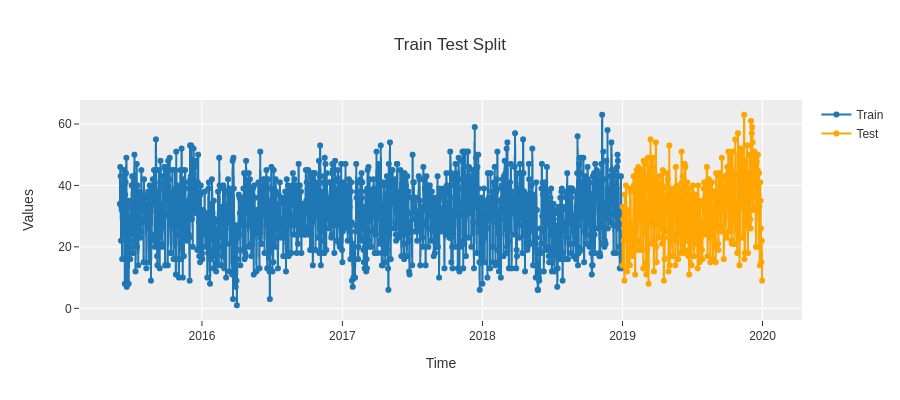

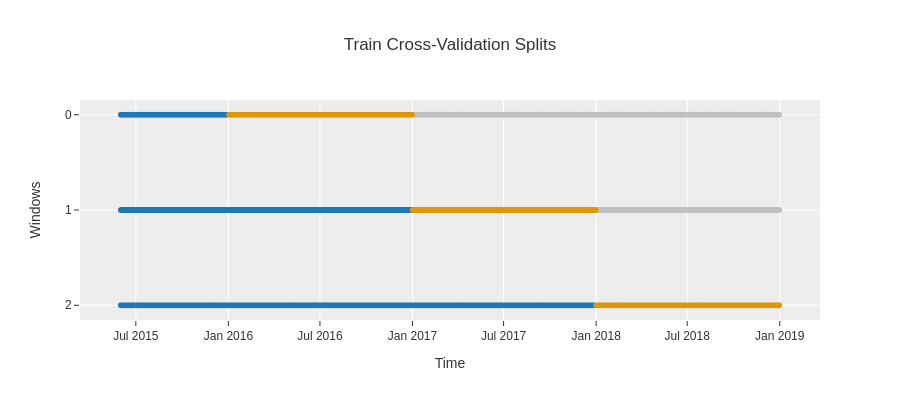

In [16]:
s_exo.plot_model(plot="train_test_split", fig_kwargs={"height": 400, "width": 900})
s_exo.plot_model(plot="cv", fig_kwargs={"height": 400, "width": 900})

# **Gráfico do ajuste**

In [7]:
df_modelo = df.copy()
df_modelo = pd.get_dummies(df_modelo, drop_first = True)
s_exo = setup(df_modelo, session_id = 123, fh=365, seasonal_period = [7, 14, 21, 28], target = ['num_acidentes'])
loaded_model = load_model(path + 'saved_models/auto_arima_exogenas_best')

,Description,Value
0,session_id,123
1,Target,num_acidentes
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(1675, 9)"
5,Train data shape,"(1310, 9)"
6,Test data shape,"(365, 9)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


Transformation Pipeline and Model Successfully Loaded


Resultado no conjunto de teste

In [8]:
results = predict_model(loaded_model, fh = 365, return_pred_int=True)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Auto ARIMA,3.1486,4.0739,0.1022,0.1013,0.3571,0.3495,0.8652


In [9]:
y_obs = df.query("data>='2019-01-01'")['num_acidentes']
y_pred = results.y_pred

Podemos observar a qualidade do ajuste também de forma gráfica. Abaixo temos o ajuste para o conjunto de teste.

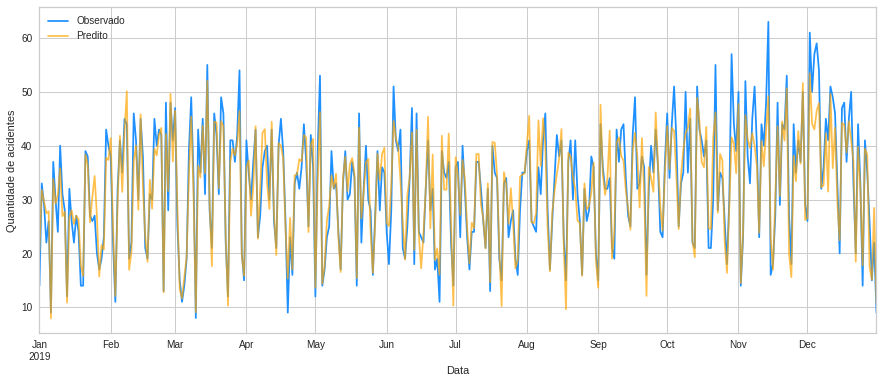

In [15]:
plt.figure(figsize=(15, 6))
y_obs.plot(label="Observado", color='dodgerblue')
y_pred.plot(label="Predito", color='orange', alpha=0.7)
plt.xlabel("Data")
plt.ylabel("Quantidade de acidentes")
plt.legend()